# Some visual analysis of the dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import csv
import seaborn as sns

import nltk
import nltk.corpus # sample text for performing tokenization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
# Importing twitter dataset

twitter_df = pd.read_csv('data/twitter_all_data.csv',index_col=False)


Text(0.5, 0, 'Cyberbully')

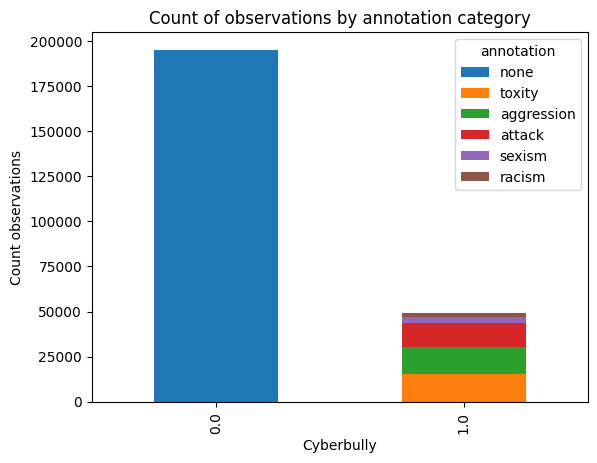

In [3]:
# Create count plot to show number of observations by category

df_plot = twitter_df.groupby(['annotation', 'oh_label']).size().reset_index().pivot(columns='annotation', index='oh_label', values=0)
df_plot.head()
df_plot[["none","toxity","aggression","attack","sexism","racism"]].plot(kind='bar', stacked=True)
plt.title("Count of observations by annotation category")
plt.ylabel("Count observations")
plt.xlabel("Cyberbully")

In [24]:
# Create stopword list:
mystopwords = set(stopwords.words('english'))

#A function to generate the word cloud from text
def my_wordcloud(data, title):
    cloud = WordCloud(max_words=150,
                      stopwords=mystopwords,
                      background_color="white",
                      collocations=False).generate(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=11)
    plt.show()

There are 57211202 words in the combination of all comments.


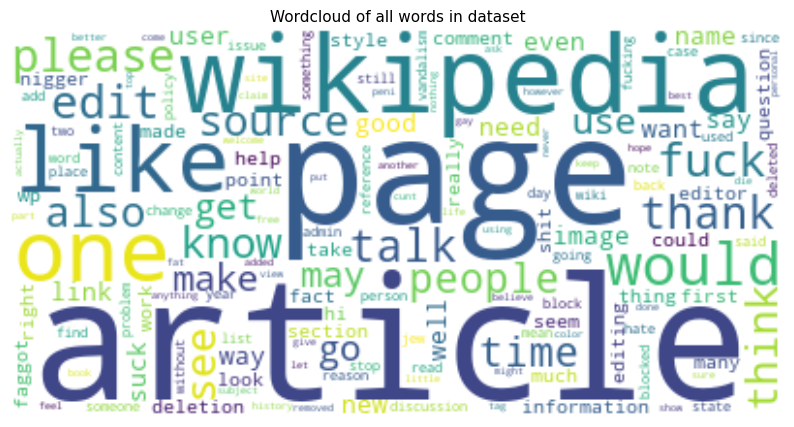

In [38]:
# Generate a word cloud image
text = ','.join(str(v) for v in twitter_df.tokenized)

print ("There are {} words in the combination of all comments.".format(len(text)))

my_wordcloud(text,"Wordcloud of all words in dataset")

There are 873468 hashtags in the combination of all review.


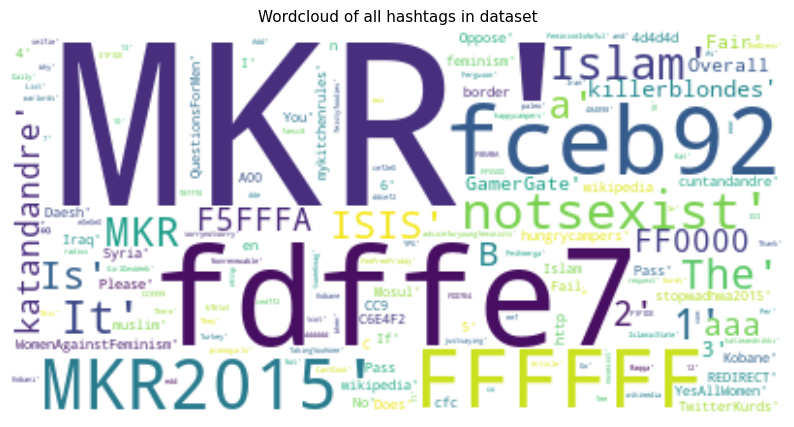

In [26]:
# Generate a hashtags word cloud image
hashtag = ','.join(str(v) for v in twitter_df.hashtags)

print ("There are {} hashtags in the combination of all review.".format(len(hashtag)))

my_wordcloud(hashtag,"Wordcloud of all hashtags in dataset")

In [27]:
# Join all reviews of each class and label:
ra = ",".join(str(v) for v in twitter_df[twitter_df["annotation"]=="racism"].tokenized)
sex = ",".join(str(v) for v in twitter_df[twitter_df["annotation"]=="sexism"].tokenized)
tox = ",".join(str(v) for v in twitter_df[twitter_df["annotation"]=="toxity"].tokenized)
agr = ",".join(str(v) for v in twitter_df[twitter_df["annotation"]=="aggression"].tokenized)
att = ",".join(str(v) for v in twitter_df[twitter_df["annotation"]=="attack"].tokenized)

oh1 = ",".join(str(v) for v in twitter_df[twitter_df["oh_label"]==1.0].tokenized)
oh0 = ",".join(str(v) for v in twitter_df[twitter_df["oh_label"]==0.0].tokenized)

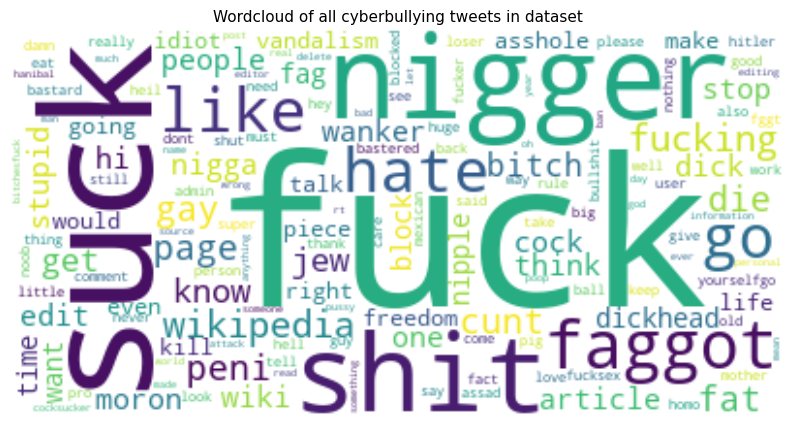

In [31]:
# Generate a word cloud image for cyberbullying
my_wordcloud(oh1,"Wordcloud of all cyberbullying tweets in dataset")


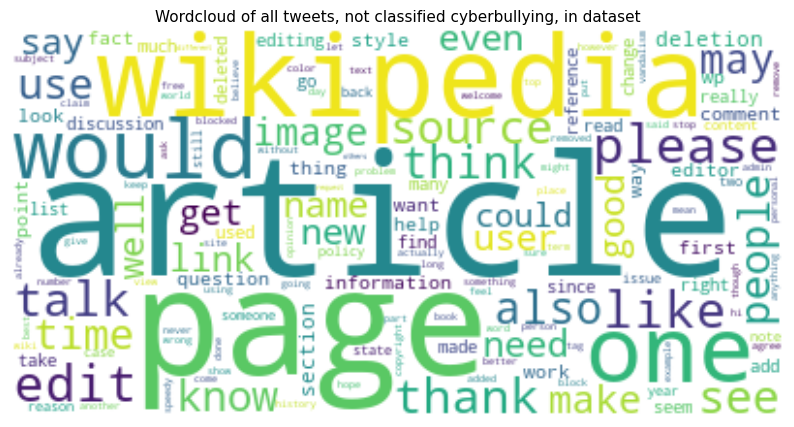

In [32]:
# Generate a word cloud image for cyberbullying
my_wordcloud(oh0,"Wordcloud of all tweets, not classified cyberbullying, in dataset")

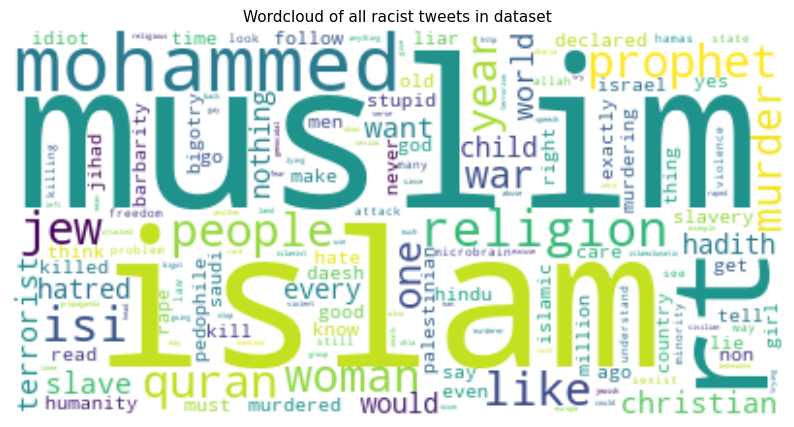

In [33]:
# Generate a word cloud image for racism
my_wordcloud(ra,"Wordcloud of all racist tweets in dataset")

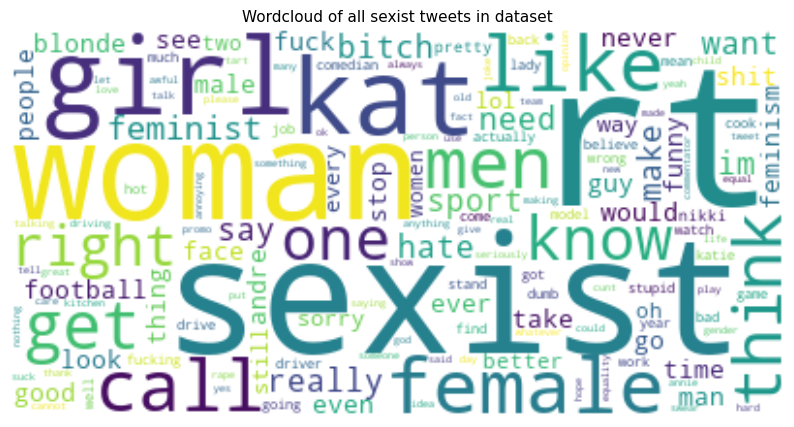

In [34]:
# Generate a word cloud image for sexism
my_wordcloud(sex,"Wordcloud of all sexist tweets in dataset")

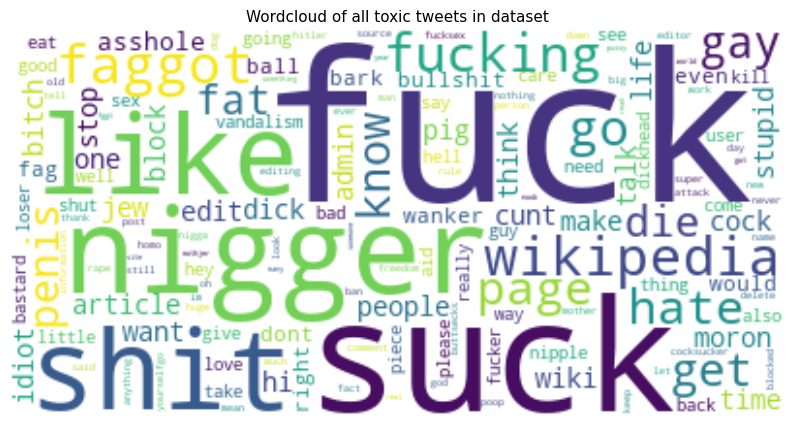

In [35]:
# Generate a word cloud image for toxity
my_wordcloud(tox,"Wordcloud of all toxic tweets in dataset")


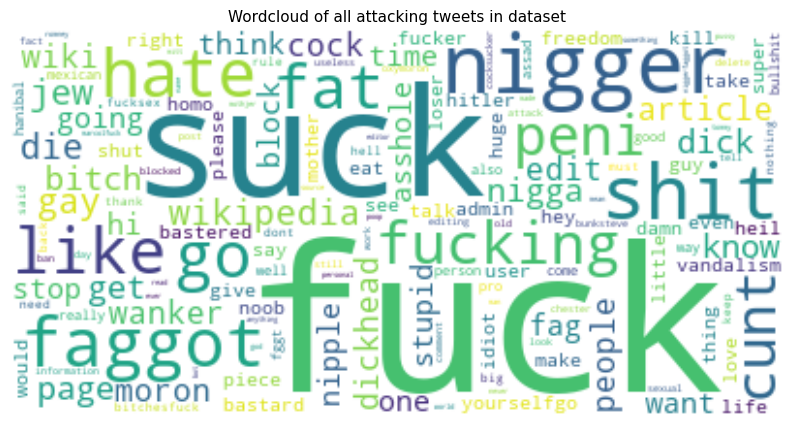

In [36]:
# Generate a word cloud image for attack
my_wordcloud(att,"Wordcloud of all attacking tweets in dataset")


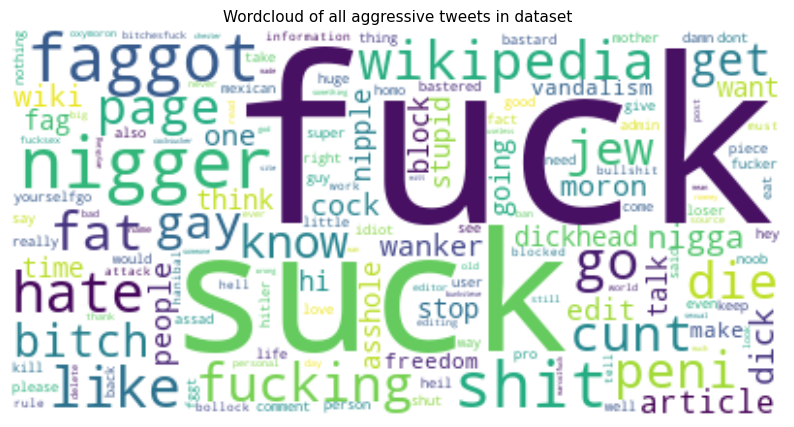

In [37]:
# Generate a word cloud image for aggression
my_wordcloud(agr,"Wordcloud of all aggressive tweets in dataset")